This notebook was based on [This from Kaggle](https://www.kaggle.com/code/isbhargav/guide-to-pytorch-learning-rate-scheduling)

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [8]:
import torch
import matplotlib.pyplot as plt

In [9]:
# Print the PyTorch version and the GPU availability
print(f'Pytorch Version: {torch.__version__}')
print(f'CUDA is available: {torch.cuda.is_available()}')

Pytorch Version: 2.3.0+cu121
CUDA is available: True


# 1. LAMBDA LR¶

Sets the learning rate of each parameter group to the initial lr times a given function. When last_epoch=-1, sets initial lr as lr.

\begin{equation}
lr_{epoch}=lr_{initial}∗Lambda(epoch)
\end{equation}

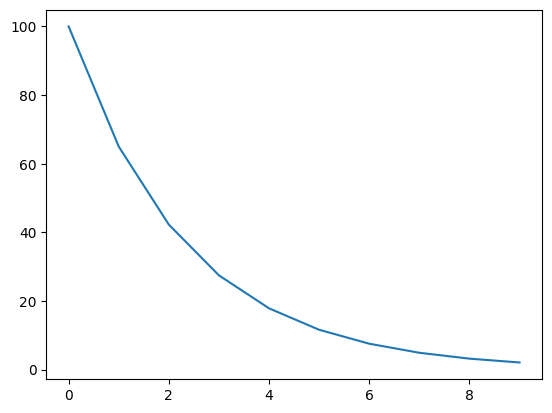

In [13]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
lambda1 = lambda epoch: 0.65 ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ", round(0.65 ** i,3)," , Learning Rate = ",round(optimizer.param_groups[0]["lr"],3))
    scheduler.step()

plt.plot(range(10),lrs)

# 2. MultiplicativeLR

Multiply the learning rate of each parameter group by the factor given in the specified function. When last_epoch=-1, sets initial lr as lr.

\begin{equation}
lr_{epoch}=lr_{epoch - 1}∗Lambda(epoch)
\end{equation}
 


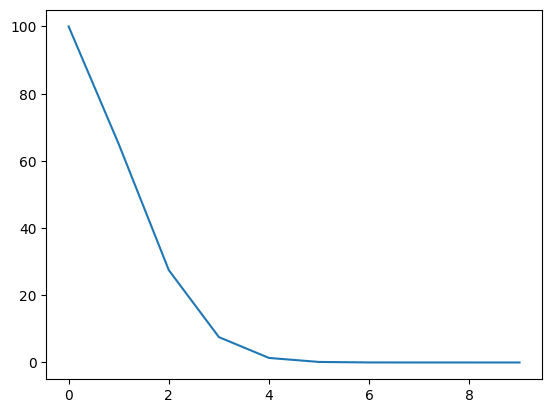

In [14]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
lmbda = lambda epoch: 0.65 ** epoch
scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lmbda)
lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.95," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs)

# 3. StepLR

Decays the learning rate of each parameter group by gamma every step_size epochs. Notice that such decay can happen simultaneously with other changes to the learning rate from outside this scheduler. When last_epoch=-1, sets initial lr as lr.

\begin{equation}
lr_{epoch} = \begin{cases}
Gamma * lr_{epoch - 1}, & \text{if } \text{epoch} \% \text{step\_size} = 0 \\
lr_{epoch - 1}, & \text{otherwise}
\end{cases}
\end{equation}

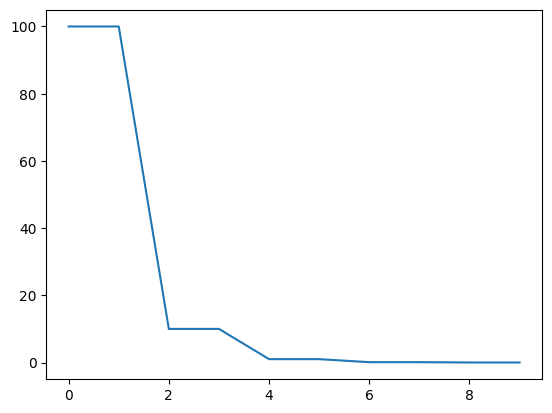

In [15]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)
lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.1 if i!=0 and i%2!=0 else 1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs)

# 4. MultiStepLR

Decays the learning rate of each parameter group by gamma once the number of epoch reaches one of the milestones. Notice that such decay can happen simultaneously with other changes to the learning rate from outside this scheduler. When last_epoch=-1, sets initial lr as lr.

\begin{equation}
lr_{epoch} = \begin{cases}
Gamma * lr_{epoch - 1}, & \text{if } \text{epoch in [milestones]} \\
lr_{epoch - 1}, & \text{otherwise}
\end{cases}
\end{equation}

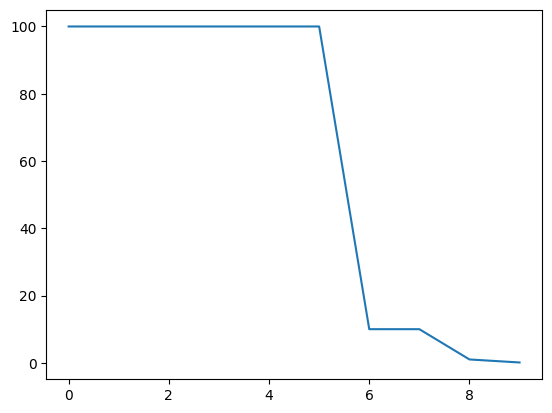

In [16]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6,8,9], gamma=0.1)
lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.1 if i in [6,8,9] else 1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs)